### Imports

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import random
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import torch

### Paths

In [2]:
src_folder = Path.cwd()
root_folder = src_folder.parent
dataset_folder = os.path.join(root_folder, 'dataset')
results_folder = os.path.join(root_folder, 'results')

RAW_DIR = os.path.join(dataset_folder, 'raw')
PREPROCESSED_DIR = os.path.join(dataset_folder, 'preprocessed')
CSV_PATH = os.path.join(dataset_folder, 'csv_mappings', 'train.csv')

### Class mappings

In [3]:
CLASS_NAMES = {
    0: "amanita",
    1: "boletus",
    2: "chantelle",
    3: "deterrimus",
    4: "rufus",
    5: "torminosus",
    6: "aurantiacum",
    7: "procera",
    8: "involutus",
    9: "russula"
}

### Load, preprocess, save functions

In [4]:
def load_image(image_path):
    try:
        with Image.open(image_path) as img:
            img.load() 
            return img
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

In [5]:
def preprocess_image(img, target_size=(224, 224)):
    img = img.resize(target_size)
    img = np.array(img) / 255.0
    return img

In [6]:
def load_and_process_image(image_path, target_size=(224, 224)):
    img = load_image(image_path)
    if img.mode != 'RGB':  
        img = img.convert('RGB')  
    img = preprocess_image(img, target_size)
    return img

In [7]:
def preprocess_samples(n, raw_dir, target_size=(224, 224)):
    image_files = [f for f in os.listdir(raw_dir) if f.endswith('.jpg')]
    sample_images = random.sample(image_files, n)

    original_images = []
    processed_images = []

    for image_file in sample_images:
        image_path = os.path.join(raw_dir, image_file)
        img = load_image(image_path)

        if img is None:
            print(f"Skipping {image_file} due to loading failure.")
            continue

        original_images.append(img) 
        processed_img = load_and_process_image(image_path, target_size)
        processed_images.append(processed_img)  

    return original_images, processed_images

In [8]:
def show_images(original_images, processed_images, axis_on=False):
    n = len(original_images)
    groups = (n + 4) // 5  
    
    for group in range(groups):
        start_idx = group * 5
        end_idx = min((group + 1) * 5, n)

        print(f"Showing group {group + 1} (Images {start_idx + 1} to {end_idx})")

        fig, axes = plt.subplots(2, end_idx - start_idx, figsize=(15, 3))
        axes = axes.flatten()

        for i in range(start_idx, end_idx):
            original_idx = i - start_idx 
            
            # Show original 
            axes[original_idx].imshow(original_images[i])
            axes[original_idx].set_title(f'Original {i + 1}')
            
            # Show processed
            axes[original_idx + len(axes) // 2].imshow(processed_images[i])
            axes[original_idx + len(axes) // 2].set_title(f'Processed {i + 1}')
            
            if not axis_on:
                axes[original_idx].axis('off')
                axes[original_idx + len(axes) // 2].axis('off')
        
        plt.tight_layout()
        plt.show()

In [9]:
def verify_preprocessing_sample(n, raw_dir, target_size=(224, 224), axis_on=False):
    original_images, processed_images = preprocess_samples(n, raw_dir, target_size)
    show_images(original_images, processed_images, axis_on)

### Verify preprocessing on samples

Showing group 1 (Images 1 to 5)


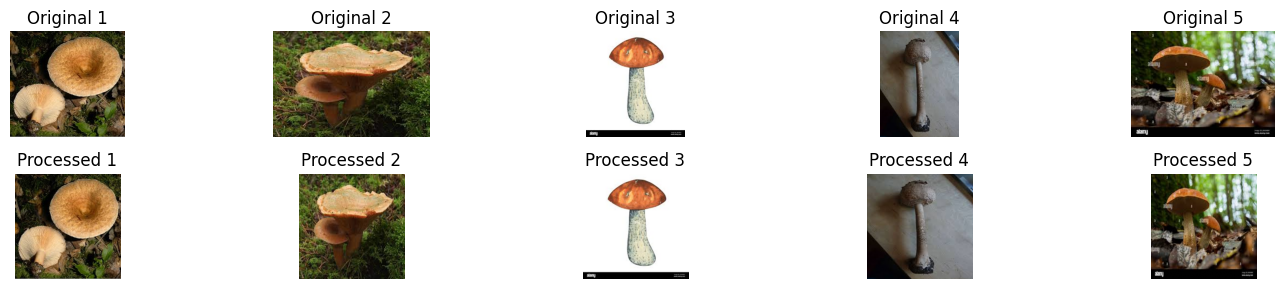

Showing group 2 (Images 6 to 10)


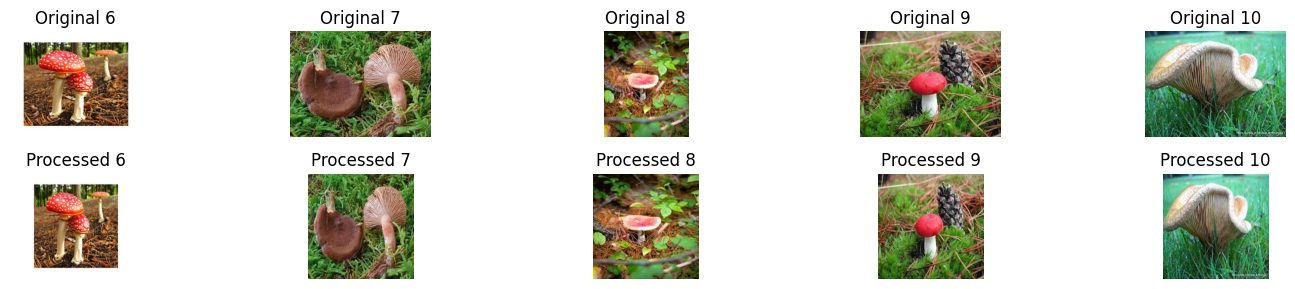

In [10]:
verify_preprocessing_sample(10, RAW_DIR, axis_on=False)

### Preprocess and save all

In [11]:
def preprocess_and_save_as_tensors(raw_dir, preprocessed_dir, target_size=(224, 224)):
    if not os.path.exists(preprocessed_dir):
        os.makedirs(preprocessed_dir) 

    image_files = [f for f in os.listdir(raw_dir) if f.endswith('.jpg')]

    for image_file in image_files:
        image_path = os.path.join(raw_dir, image_file)

        try:
            # Load and preprocess
            img = load_and_process_image(image_path, target_size) 
    
            # Convert NumPy to tensor
            tensor_img = torch.tensor(img, dtype=torch.float32).permute(2, 0, 1) 

            # Save as a .pt
            tensor_path = os.path.join(preprocessed_dir, image_file.replace('.jpg', '.pt'))
            torch.save(tensor_img, tensor_path)
            print(f"Processed and saved as tensor: {tensor_path}")

        except Exception as e:
            print(f"Error processing {image_file}: {e}")


In [12]:
preprocess_and_save_as_tensors(RAW_DIR, PREPROCESSED_DIR, target_size=(224, 224))

Processed and saved as tensor: c:\Users\ilian\Documents\Projects\git_projects\university\mushroom_classification\dataset\preprocessed\00001.pt
Processed and saved as tensor: c:\Users\ilian\Documents\Projects\git_projects\university\mushroom_classification\dataset\preprocessed\00002.pt
Processed and saved as tensor: c:\Users\ilian\Documents\Projects\git_projects\university\mushroom_classification\dataset\preprocessed\00003.pt
Processed and saved as tensor: c:\Users\ilian\Documents\Projects\git_projects\university\mushroom_classification\dataset\preprocessed\00004.pt
Processed and saved as tensor: c:\Users\ilian\Documents\Projects\git_projects\university\mushroom_classification\dataset\preprocessed\00005.pt
Processed and saved as tensor: c:\Users\ilian\Documents\Projects\git_projects\university\mushroom_classification\dataset\preprocessed\00006.pt
Processed and saved as tensor: c:\Users\ilian\Documents\Projects\git_projects\university\mushroom_classification\dataset\preprocessed\00007.pt